In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium


In [2]:
# Load the world_country_stats.csv file
country_stats = pd.read_csv('/kaggle/input/world-population-dataset/world_country_stats.csv')

# Display basic statistics and information about the dataset
print(country_stats.info())
print(country_stats.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         234 non-null    object 
 1   region          234 non-null    object 
 2   land_area       234 non-null    int64  
 3   fertility_rate  233 non-null    float64
 4   median_age      233 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.3+ KB
None
          land_area  fertility_rate  median_age
count  2.340000e+02      233.000000  233.000000
mean   5.559568e+05        2.414163   31.309013
std    1.691024e+06        1.155913    9.628386
min    0.000000e+00        0.800000   15.000000
25%    2.650000e+03        1.600000   22.000000
50%    7.972000e+04        2.000000   32.000000
75%    4.070800e+05        3.000000   40.000000
max    1.637687e+07        6.700000   54.000000


In [3]:
# Load the world_population_by_country_2023.csv file
population_2023 = pd.read_csv('/kaggle/input/world-population-dataset/world_population_by_country_2023.csv')

# Display basic statistics and information about the dataset
print(population_2023.info())
print(population_2023.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           234 non-null    object 
 1   population        234 non-null    int64  
 2   yearly_change     234 non-null    float64
 3   net_change        234 non-null    int64  
 4   density           234 non-null    int64  
 5   land_area         234 non-null    int64  
 6   net_migrants      234 non-null    int64  
 7   fertility_rate    233 non-null    float64
 8   median_age        233 non-null    float64
 9   population_urban  216 non-null    float64
 10  world_share       234 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 20.2+ KB
None
         population  yearly_change    net_change       density     land_area  \
count  2.340000e+02     234.000000  2.340000e+02    234.000000  2.340000e+02   
mean   3.437565e+07       0.965470  3.000230e+05    477.

In [4]:
# Load the world_population_by_year_1950_2023.csv file
population_by_year = pd.read_csv('/kaggle/input/world-population-dataset/world_population_by_year_1950_2023.csv')

# Display basic statistics and information about the dataset
print(population_by_year.info())
print(population_by_year.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 75 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  234 non-null    object
 1   1950     234 non-null    int64 
 2   1951     234 non-null    int64 
 3   1952     234 non-null    int64 
 4   1953     234 non-null    int64 
 5   1954     234 non-null    int64 
 6   1955     234 non-null    int64 
 7   1956     234 non-null    int64 
 8   1957     234 non-null    int64 
 9   1958     234 non-null    int64 
 10  1959     234 non-null    int64 
 11  1960     234 non-null    int64 
 12  1961     234 non-null    int64 
 13  1962     234 non-null    int64 
 14  1963     234 non-null    int64 
 15  1964     234 non-null    int64 
 16  1965     234 non-null    int64 
 17  1966     234 non-null    int64 
 18  1967     234 non-null    int64 
 19  1968     234 non-null    int64 
 20  1969     234 non-null    int64 
 21  1970     234 non-null    int64 
 22  19

**Merge the three datasets based on the 'country' column.**

In [5]:
# Merge the datasets based on the 'country' column
merged_data = pd.merge(country_stats, population_2023, on='country')
merged_data = pd.merge(merged_data, population_by_year, on='country')

# Display the merged dataset
print(merged_data.head())


          country   region  land_area_x  fertility_rate_x  median_age_x  \
0     Afghanistan     Asia       652860               4.4          17.0   
1         Albania   Europe        27400               1.4          38.0   
2         Algeria   Africa      2381740               2.8          28.0   
3  American Samoa  Oceania          200               2.2          29.0   
4         Andorra   Europe          470               1.1          43.0   

   population  yearly_change  net_change  density  land_area_y  ...      2014  \
0    42239854           2.70     1111083       65       652860  ...  32716210   
1     2832439          -0.35       -9882      103        27400  ...   2884102   
2    45606480           1.57      703255       19      2381740  ...  38760168   
3       43914          -0.81        -359      220          200  ...     52217   
4       80088           0.33         264      170          470  ...     71621   

       2015      2016      2017      2018      2019      2020 

**Perform basic data cleaning, handling missing values, and removing duplicates.**

In [6]:
# Check for missing values and handle them
merged_data.isnull().sum()
merged_data = merged_data.dropna()

# Remove duplicate rows if any
merged_data = merged_data.drop_duplicates()

# Display the cleaned dataset
print(merged_data.head())


       country  region  land_area_x  fertility_rate_x  median_age_x  \
0  Afghanistan    Asia       652860               4.4          17.0   
1      Albania  Europe        27400               1.4          38.0   
2      Algeria  Africa      2381740               2.8          28.0   
4      Andorra  Europe          470               1.1          43.0   
5       Angola  Africa      1246700               5.1          16.0   

   population  yearly_change  net_change  density  land_area_y  ...      2014  \
0    42239854           2.70     1111083       65       652860  ...  32716210   
1     2832439          -0.35       -9882      103        27400  ...   2884102   
2    45606480           1.57      703255       19      2381740  ...  38760168   
4       80088           0.33         264      170          470  ...     71621   
5    36684202           3.08     1095215       29      1246700  ...  27128337   

       2015      2016      2017      2018      2019      2020      2021  \
0  33753499

**Visualize the distribution of population density using a histogram.**

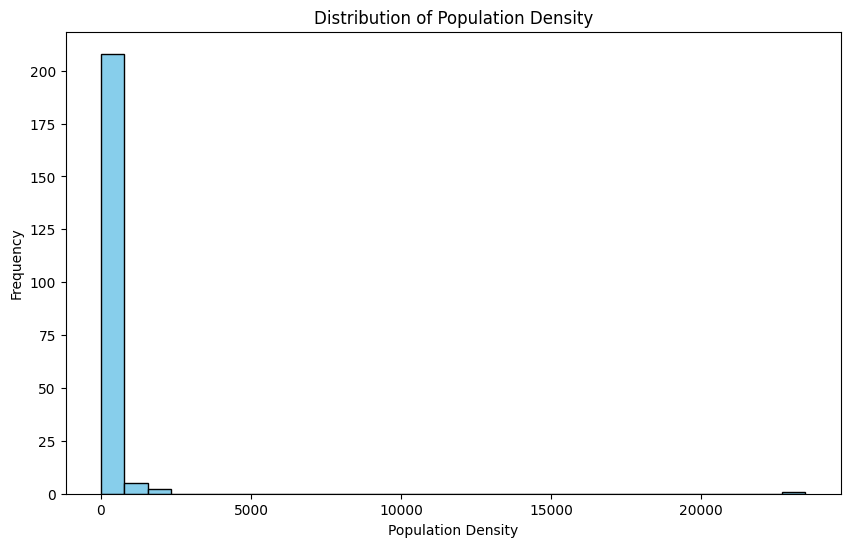

In [7]:
# Histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(merged_data['density'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Population Density')
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.show()


**Create an interactive choropleth map to visualize the world share of population.**

In [8]:
# Choropleth map using plotly
fig = px.choropleth(merged_data, 
                    locations='country', 
                    locationmode='country names',
                    color='world_share',
                    hover_name='country',
                    color_continuous_scale='Viridis',
                    title='World Share of Population')
fig.show()


**Investigate the trend of population change over the years for a specific country (e.g., United States).**

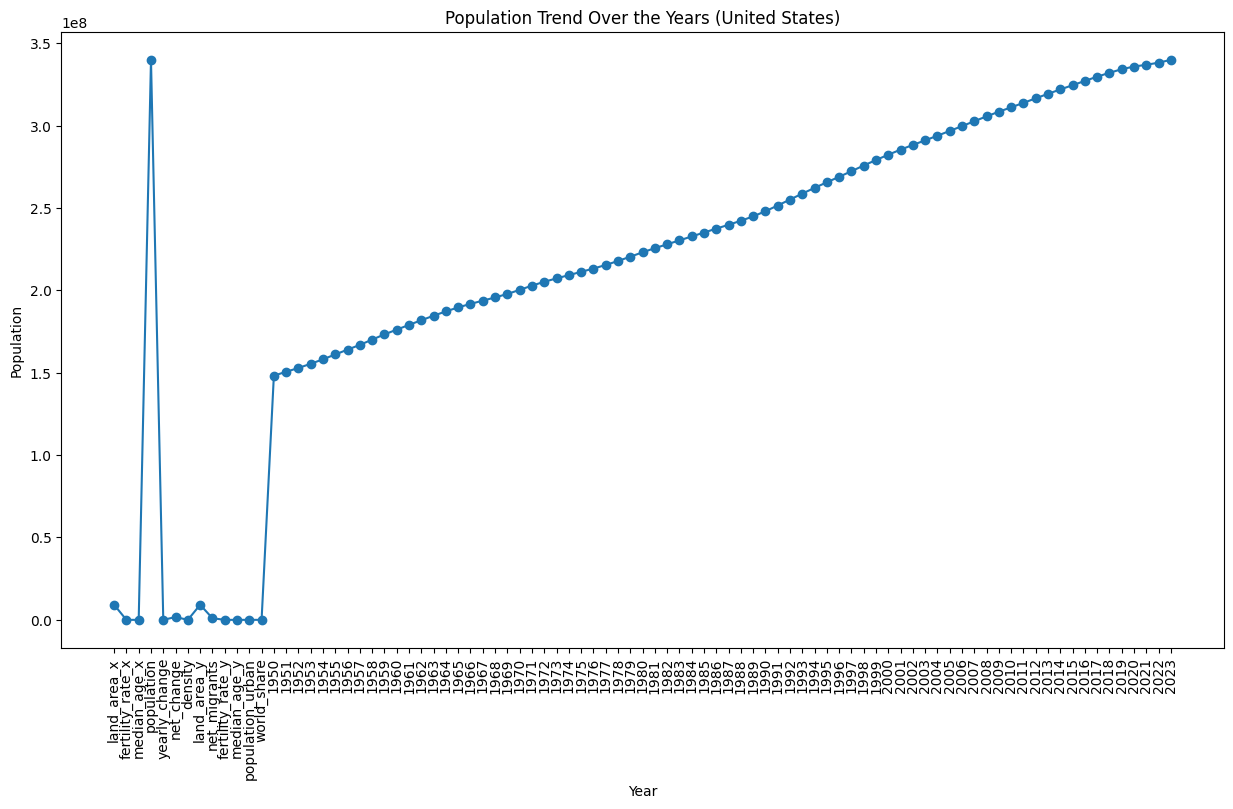

In [9]:
# Line plot using matplotlib
plt.figure(figsize=(15, 8))
plt.plot(merged_data.columns[2:], merged_data[merged_data['country'] == 'United States'].iloc[:, 2:].values.flatten(), marker='o')
plt.title('Population Trend Over the Years (United States)')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Population')
plt.show()


**Visualize the top 10 most populous countries in 2023 using a bar chart.**

In [10]:
# Bar chart for top 10 most populous countries in 2023 using plotly
top_10_countries = merged_data.sort_values(by='population', ascending=False).head(10)
fig = px.bar(top_10_countries, x='country', y='population', color='population',
             labels={'population': 'Population'},
             title='Top 10 Most Populous Countries in 2023')
fig.show()


**Investigate the relationship between net migrants and population density using a scatter plot.**

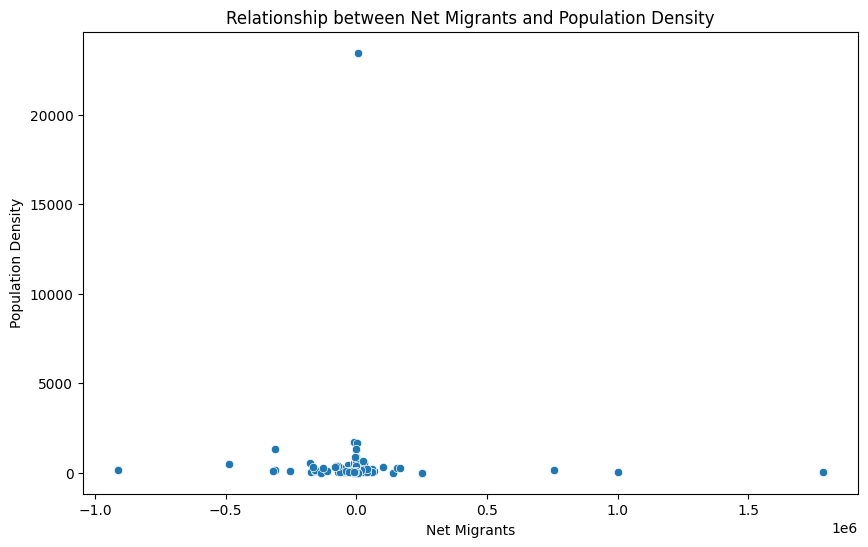

In [11]:
# Scatter plot using seaborn for net migrants vs. population density
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='net_migrants', y='density')
plt.title('Relationship between Net Migrants and Population Density')
plt.xlabel('Net Migrants')
plt.ylabel('Population Density')
plt.show()


**Visualize the change in fertility rates over the years for a specific country (e.g., China) using a line chart.**

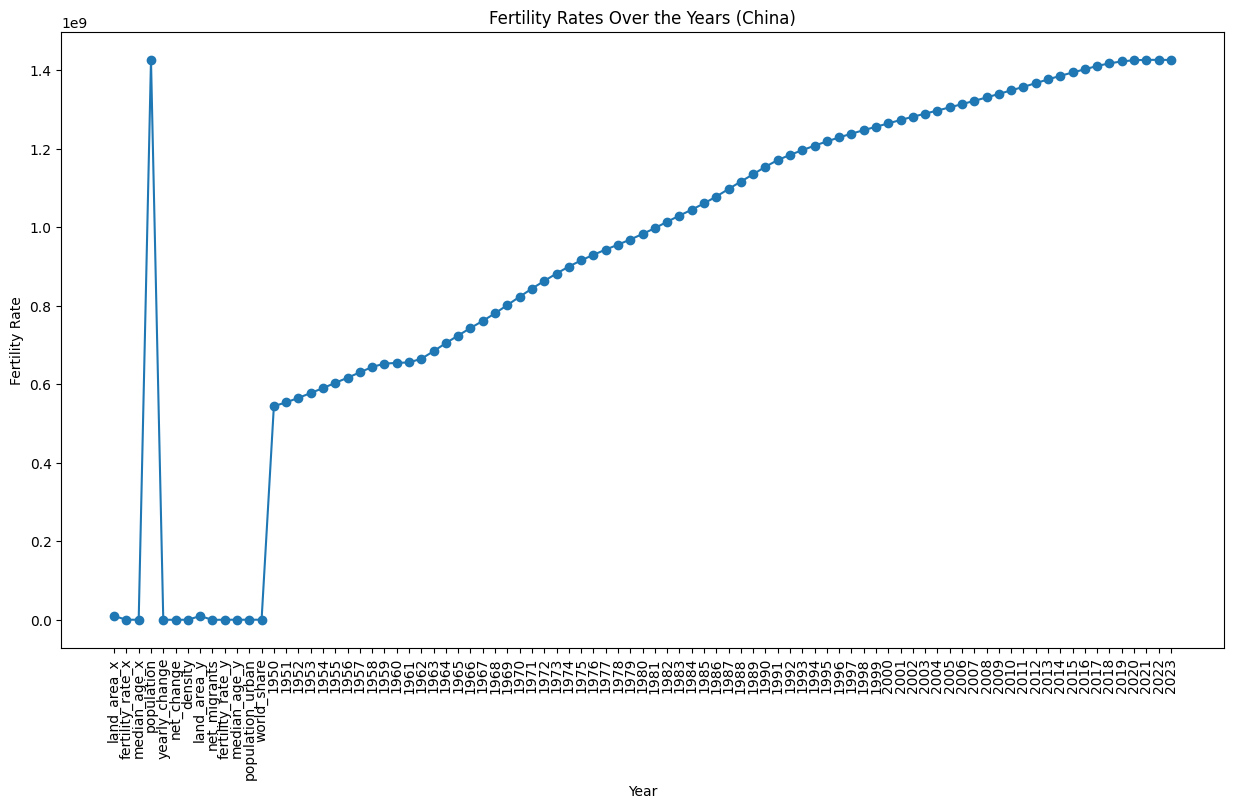

In [12]:
# Line chart using matplotlib for fertility rates over the years (China)
china_fertility = merged_data[merged_data['country'] == 'China'].iloc[:, 2:].values.flatten()
plt.figure(figsize=(15, 8))
plt.plot(merged_data.columns[2:], china_fertility, marker='o')
plt.title('Fertility Rates Over the Years (China)')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Fertility Rate')
plt.show()


**Visualize the distribution of population density across regions?**

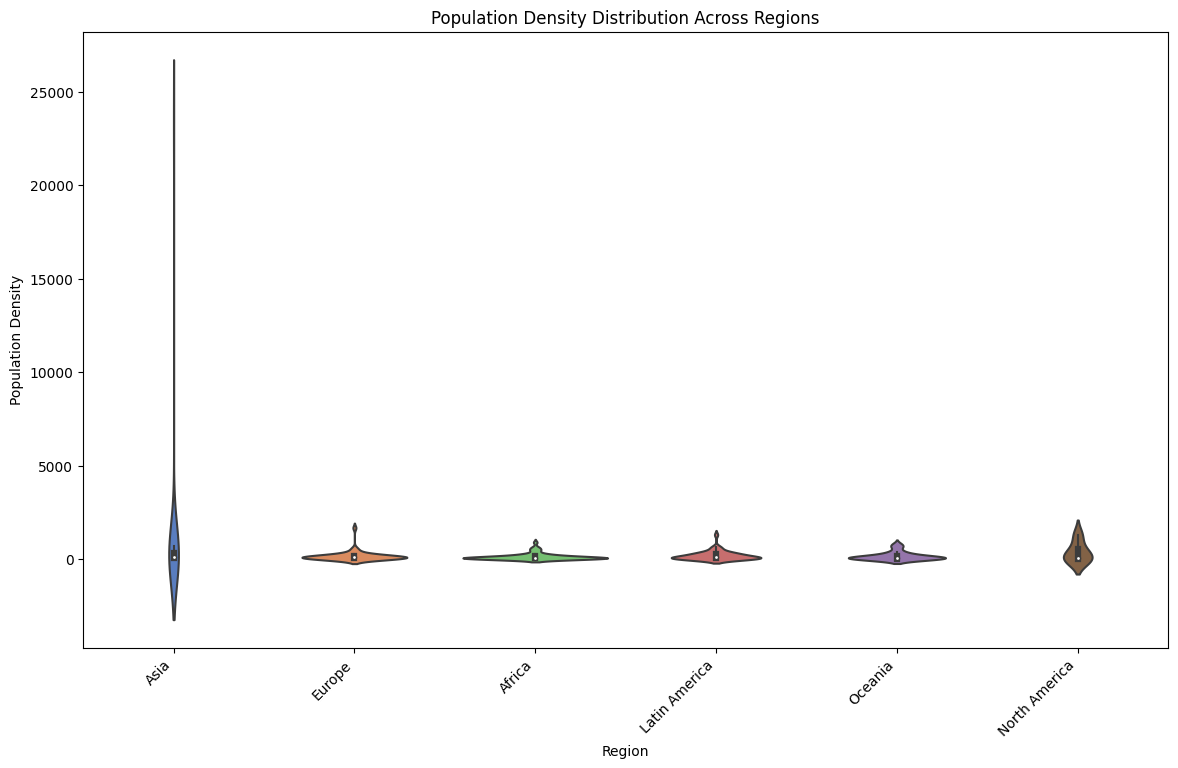

In [13]:
# Violin plot using seaborn for population density distribution across regions
plt.figure(figsize=(14, 8))
sns.violinplot(data=merged_data, x='region', y='density', palette='muted')
plt.title('Population Density Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Population Density')
plt.xticks(rotation=45, ha='right')
plt.show()


**Create a treemap to represent the proportion of the world's population for the top 10 most populous countries in 2023.**

In [14]:
# Treemap using plotly for world population distribution among top 10 countries
fig = px.treemap(top_10_countries, 
                 path=['country'], 
                 values='population', 
                 title='World Population Distribution Among Top 10 Countries (2023)')
fig.show()


**Investigate the relationship between land area and fertility rate**

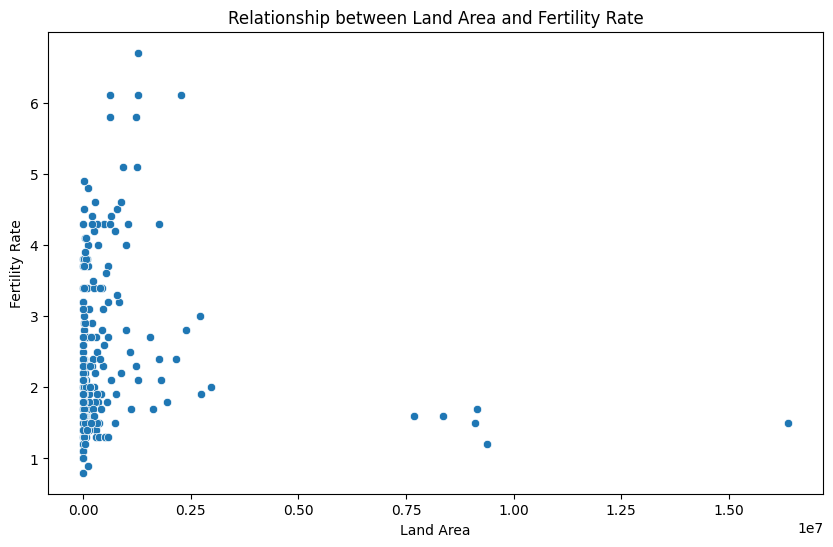

In [15]:
# Scatter plot using seaborn for land area vs. fertility rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=country_stats, x='land_area', y='fertility_rate')
plt.title('Relationship between Land Area and Fertility Rate')
plt.xlabel('Land Area')
plt.ylabel('Fertility Rate')
plt.show()


**Visualize the distribution of population density for the year 2023.**

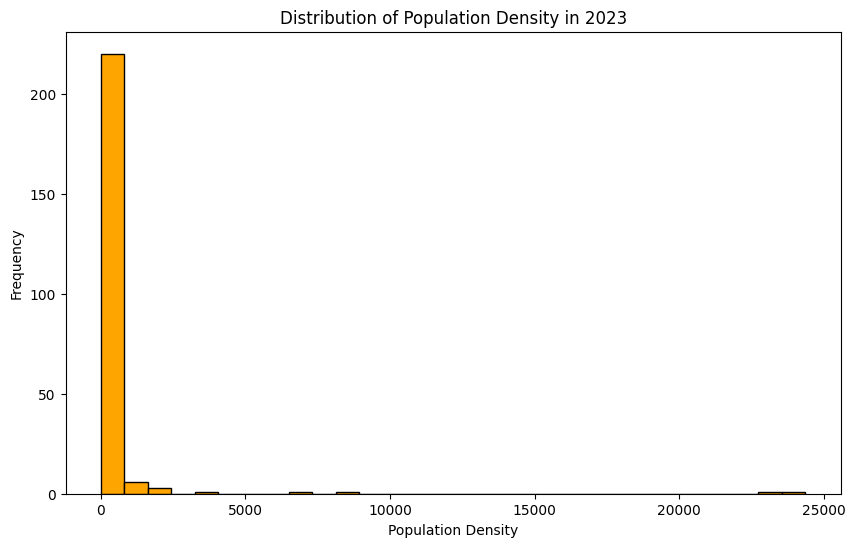

In [16]:
# Histogram using matplotlib for population density distribution in 2023
plt.figure(figsize=(10, 6))
plt.hist(population_2023['density'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Population Density in 2023')
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.show()


**Compare the yearly change in population across countries**

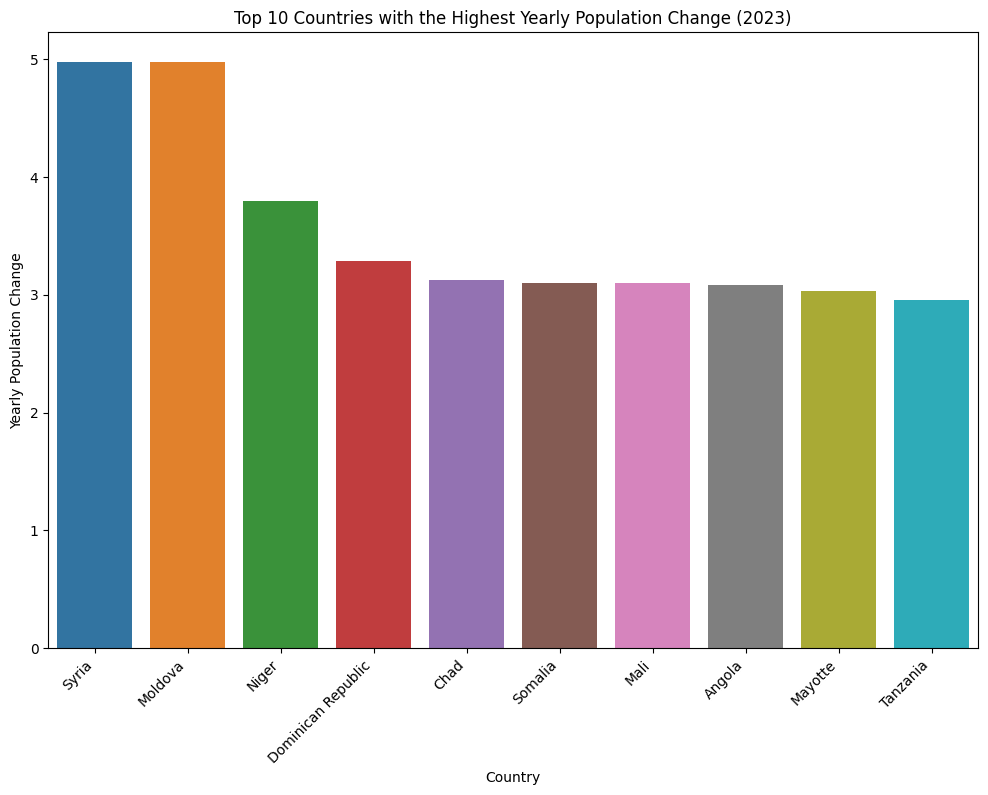

In [17]:
# Bar chart using seaborn for yearly change in population across countries
plt.figure(figsize=(12, 8))
sns.barplot(data=population_2023.sort_values(by='yearly_change', ascending=False).head(10),
            x='country', y='yearly_change', errorbar=None)
plt.title('Top 10 Countries with the Highest Yearly Population Change (2023)')
plt.xlabel('Country')
plt.ylabel('Yearly Population Change')
plt.xticks(rotation=45, ha='right')
plt.show()


**Visualize the global population growth over the years**

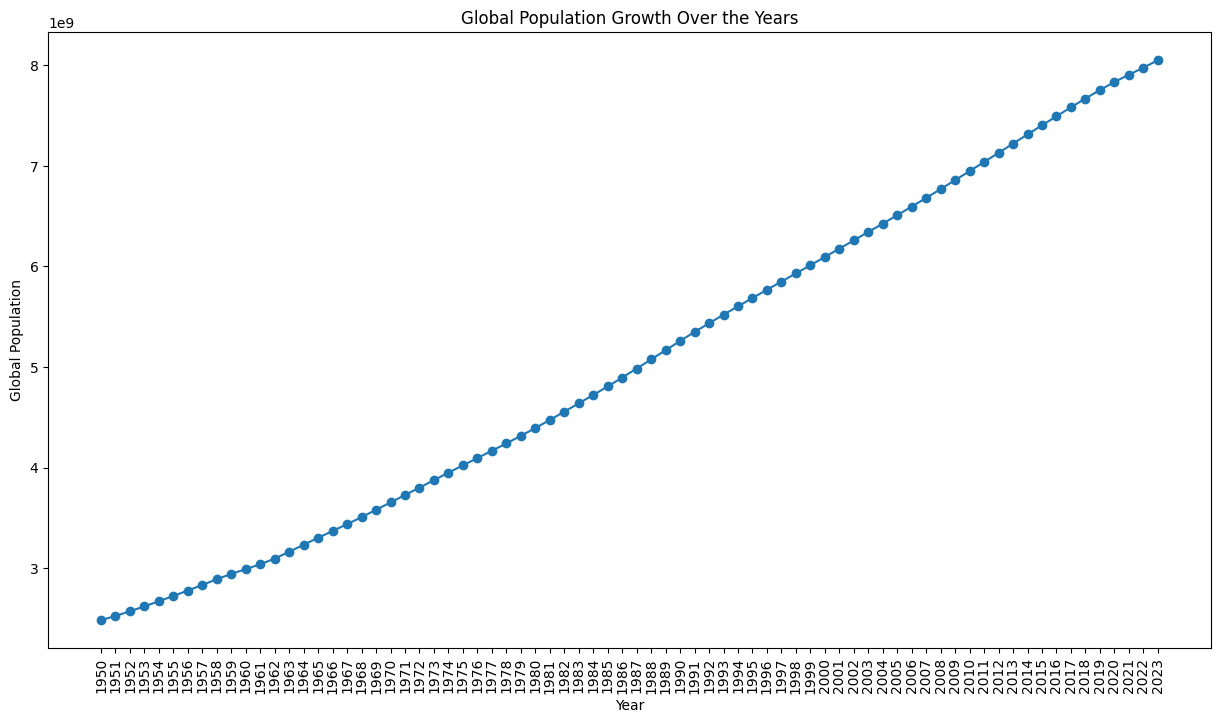

In [18]:
# Line chart using matplotlib for global population growth over the years
global_population_growth = population_by_year.iloc[:, 1:].sum()
plt.figure(figsize=(15, 8))
plt.plot(global_population_growth.index, global_population_growth.values, marker='o')
plt.title('Global Population Growth Over the Years')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Global Population')
plt.show()


**Investigate the population change in a specific country (e.g., Brazil) over the years**

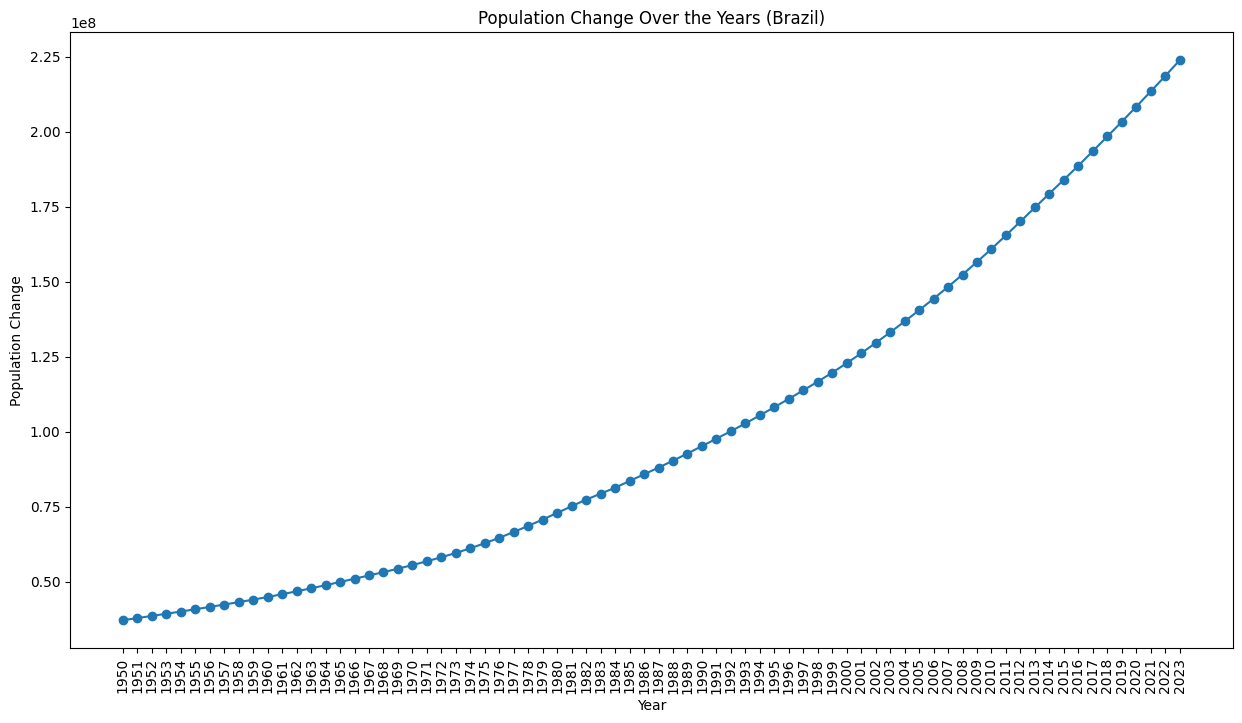

In [19]:
# Line chart using matplotlib for population change over the years (Brazil)
brazil_population_change = population_by_year[population_by_year['country'] == 'Brazil'].iloc[:, 1:].values.flatten()
plt.figure(figsize=(15, 8))
plt.plot(population_by_year.columns[1:], brazil_population_change, marker='o')
plt.title('Population Change Over the Years (Brazil)')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Population Change')
plt.show()


**Investigate the correlation between population density and net migrants.**

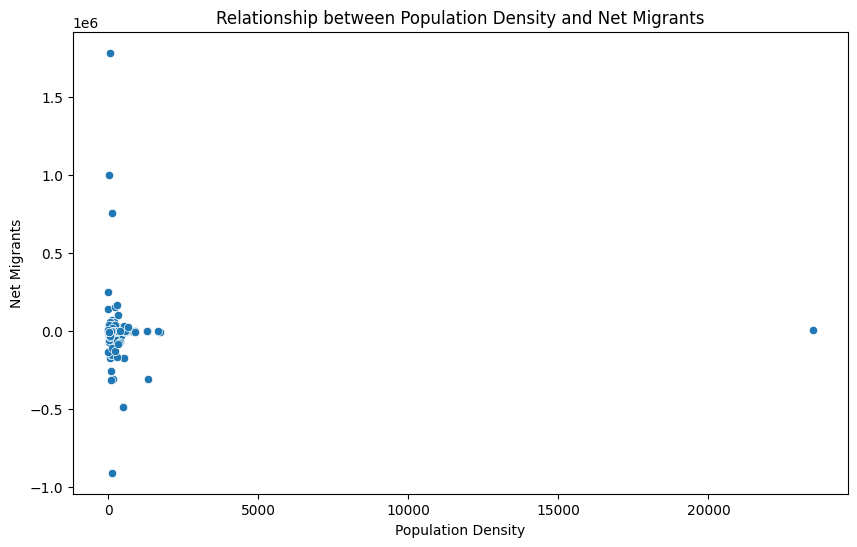

In [20]:
# Scatter plot using seaborn for population density vs. net migrants
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='density', y='net_migrants')
plt.title('Relationship between Population Density and Net Migrants')
plt.xlabel('Population Density')
plt.ylabel('Net Migrants')
plt.show()


**Visualize the distribution of land area across regions.**

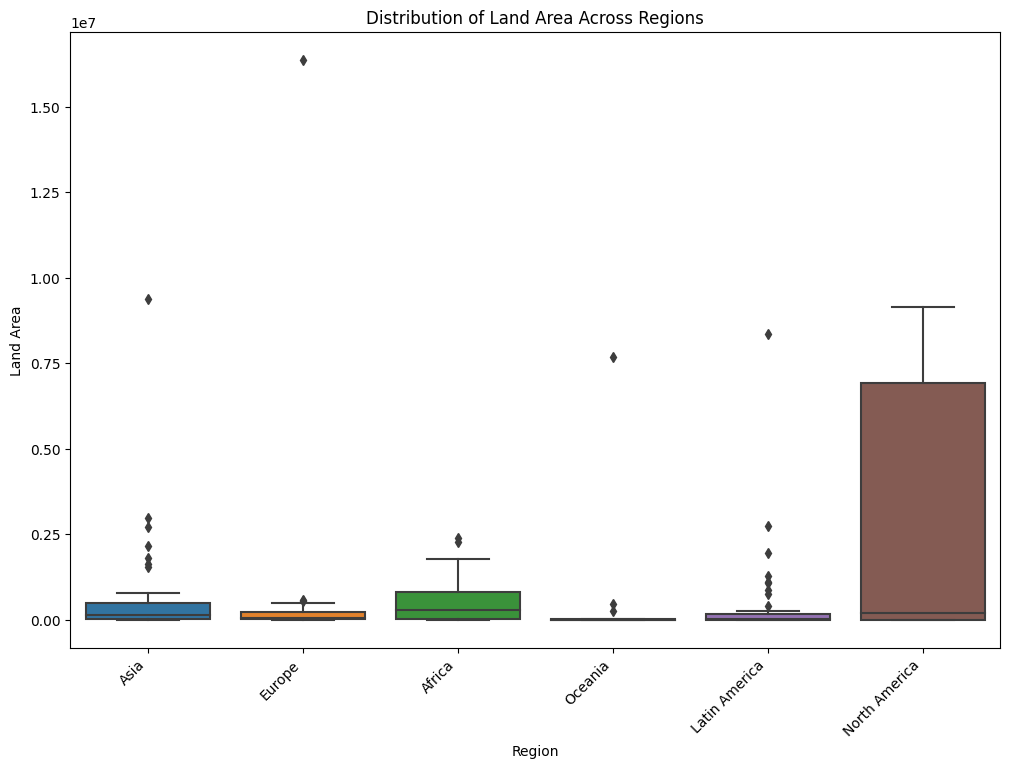

In [21]:
# Box plot using seaborn for land area distribution across regions
plt.figure(figsize=(12, 8))
sns.boxplot(data=country_stats, x='region', y='land_area')
plt.title('Distribution of Land Area Across Regions')
plt.xlabel('Region')
plt.ylabel('Land Area')
plt.xticks(rotation=45, ha='right')
plt.show()


**Compare fertility rates and median ages across different regions**

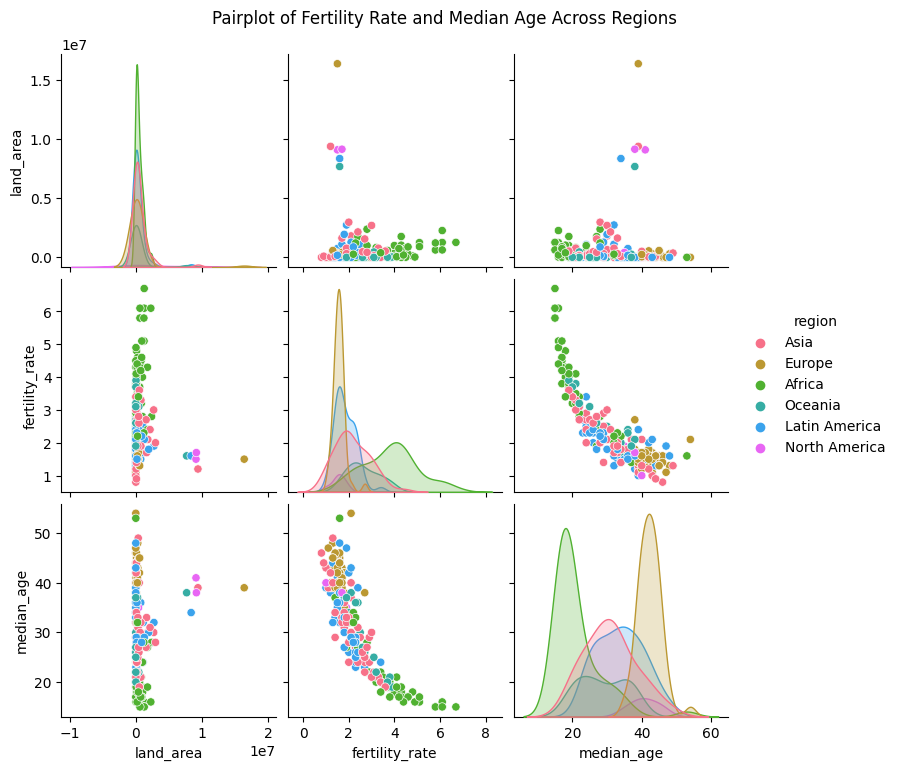

In [22]:
# Pairplot using seaborn for comparison of fertility rates and median ages across regions
sns.pairplot(country_stats, hue='region', markers='o', palette='husl')
plt.suptitle('Pairplot of Fertility Rate and Median Age Across Regions', y=1.02)
plt.show()

**Investigate the relationship between population and fertility rate**

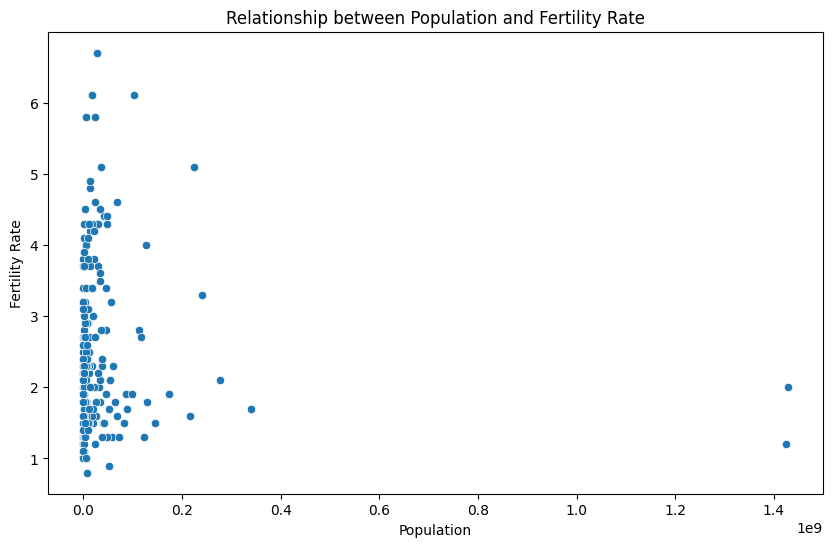

In [23]:
# Scatter plot using seaborn for population vs. fertility rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=population_2023, x='population', y='fertility_rate')
plt.title('Relationship between Population and Fertility Rate')
plt.xlabel('Population')
plt.ylabel('Fertility Rate')
plt.show()


**Explore the distribution of population in the year 2023 using a histogram.**

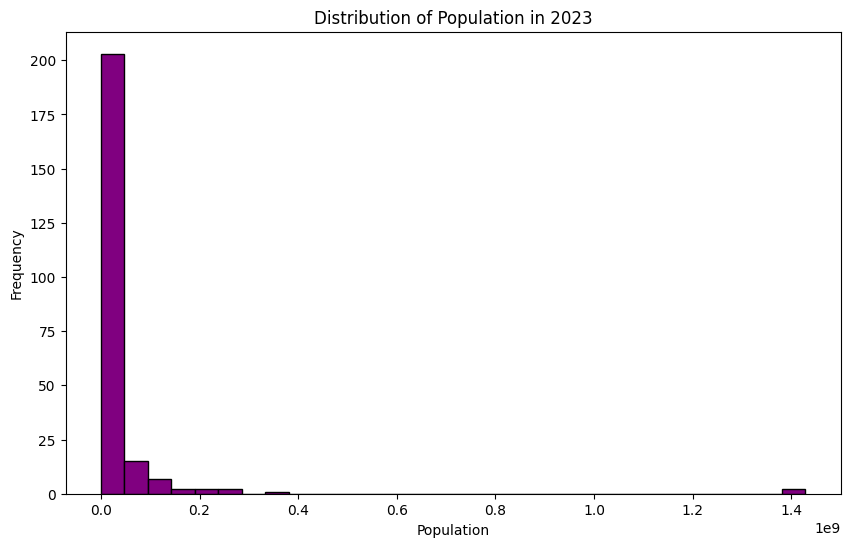

In [24]:
# Histogram using matplotlib for population distribution in 2023
plt.figure(figsize=(10, 6))
plt.hist(population_by_year['2023'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Population in 2023')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()


**Visualize the distribution of median age across regions**

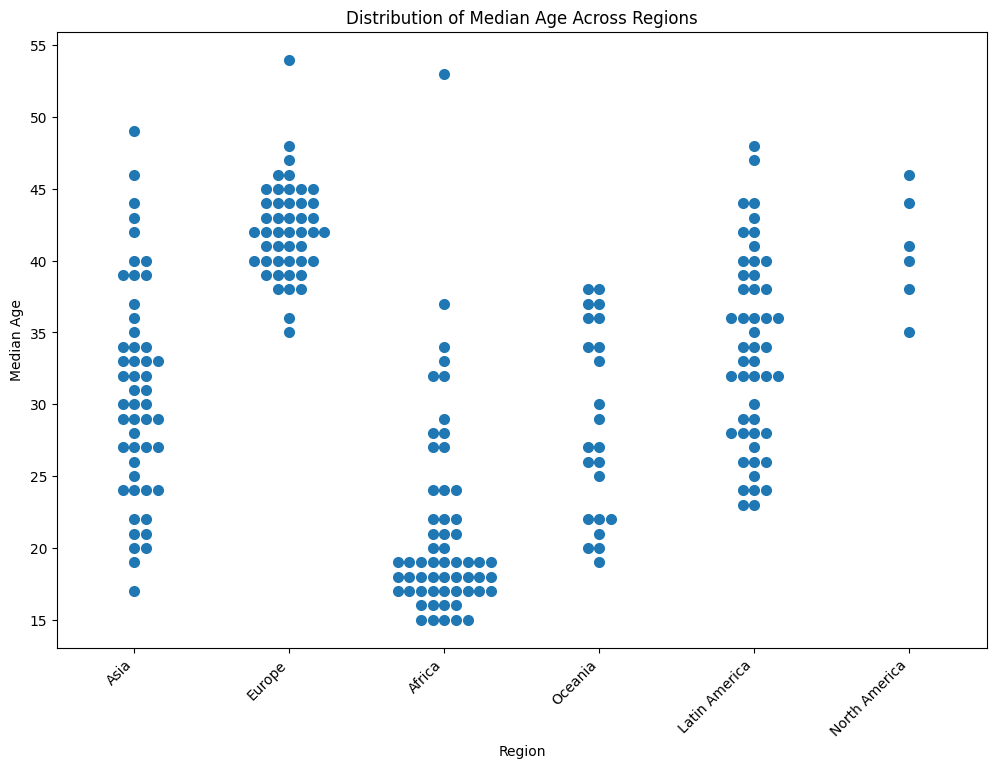

In [25]:
# Swarm plot using seaborn for median age distribution across regions
plt.figure(figsize=(12, 8))
sns.swarmplot(data=country_stats, x='region', y='median_age', size=8)
plt.title('Distribution of Median Age Across Regions')
plt.xlabel('Region')
plt.ylabel('Median Age')
plt.xticks(rotation=45, ha='right')
plt.show()


**Compare fertility rates and median ages across different regions**

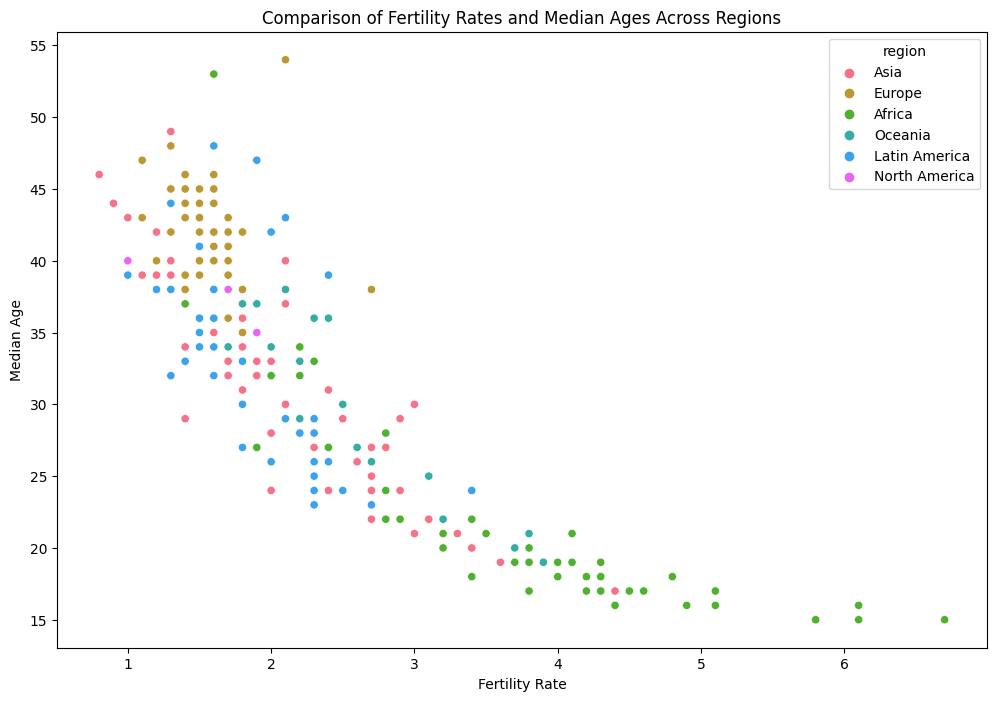

In [26]:
# Scatter plot using seaborn for comparison of fertility rates and median ages across regions
plt.figure(figsize=(12, 8))
sns.scatterplot(data=country_stats, x='fertility_rate', y='median_age', hue='region', palette='husl')
plt.title('Comparison of Fertility Rates and Median Ages Across Regions')
plt.xlabel('Fertility Rate')
plt.ylabel('Median Age')
plt.show()


**Visualize the distribution of population density for the year 2023**

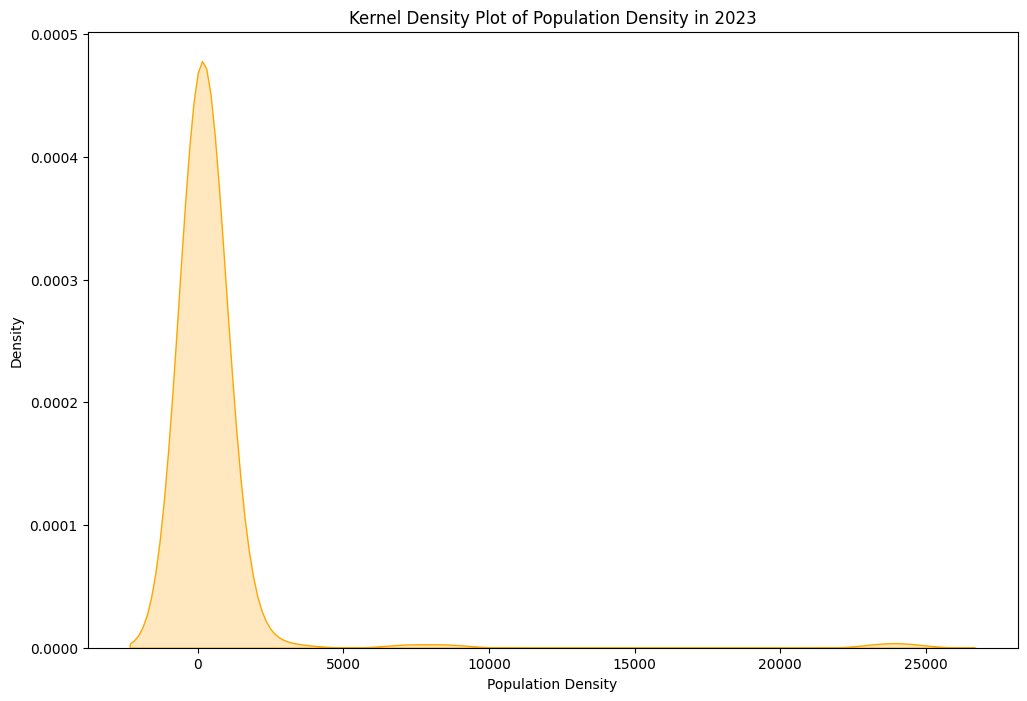

In [27]:
# Kernel density plot using seaborn for population density distribution in 2023
plt.figure(figsize=(12, 8))
sns.kdeplot(population_2023['density'], fill=True, color='orange')
plt.title('Kernel Density Plot of Population Density in 2023')
plt.xlabel('Population Density')
plt.ylabel('Density')
plt.show()


**Investigate the relationship between population and net migrants**

<Figure size 1000x800 with 0 Axes>

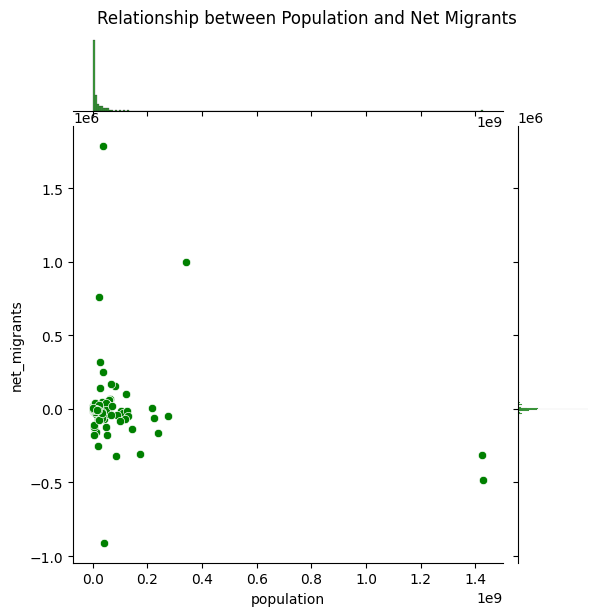

In [28]:
# Joint plot using seaborn for population vs. net migrants
plt.figure(figsize=(10, 8))
sns.jointplot(data=population_2023, x='population', y='net_migrants', kind='scatter', color='green')
plt.suptitle('Relationship between Population and Net Migrants', y=1.02)
plt.show()


**Visualize the growth trend of population for a specific country (e.g., India)**

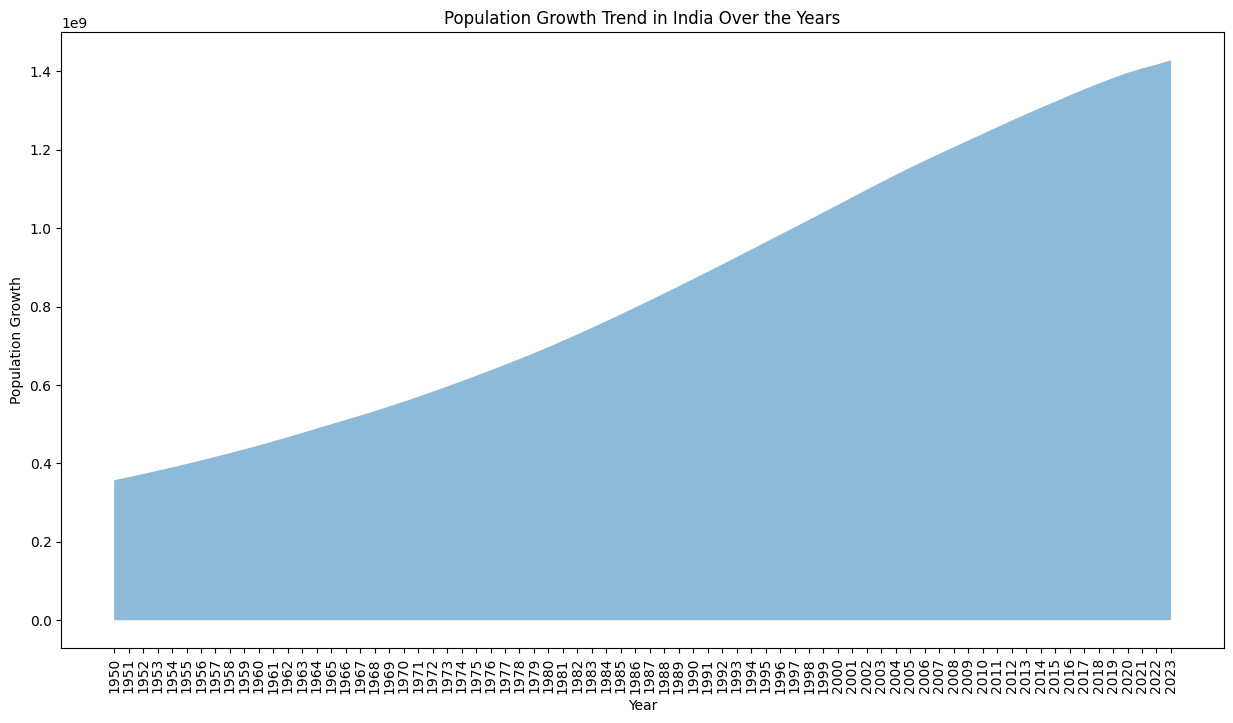

In [29]:
# Area chart using matplotlib for population growth trend (India)
plt.figure(figsize=(15, 8))
plt.fill_between(population_by_year.columns[1:], population_by_year[population_by_year['country'] == 'India'].iloc[:, 1:].values.flatten(), alpha=0.5)
plt.title('Population Growth Trend in India Over the Years')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Population Growth')
plt.show()


**Visualize the distribution of fertility rates across countries**

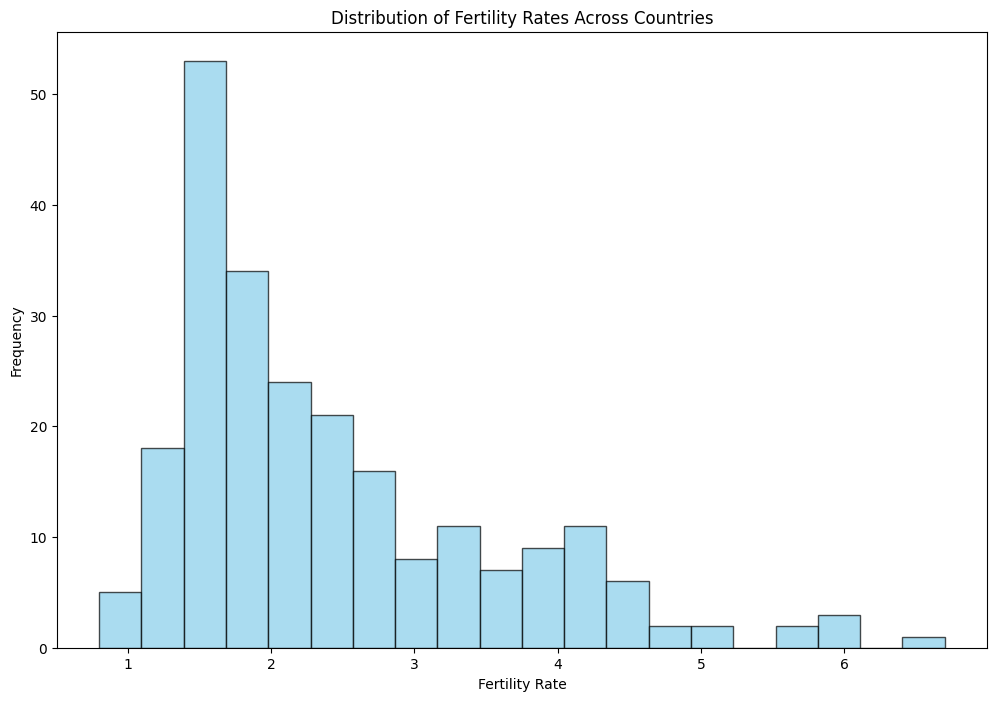

In [30]:
# Histogram using matplotlib for fertility rate distribution across countries
plt.figure(figsize=(12, 8))
plt.hist(country_stats['fertility_rate'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Fertility Rates Across Countries')
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.show()


**Investigate the distribution of yearly change in population density**

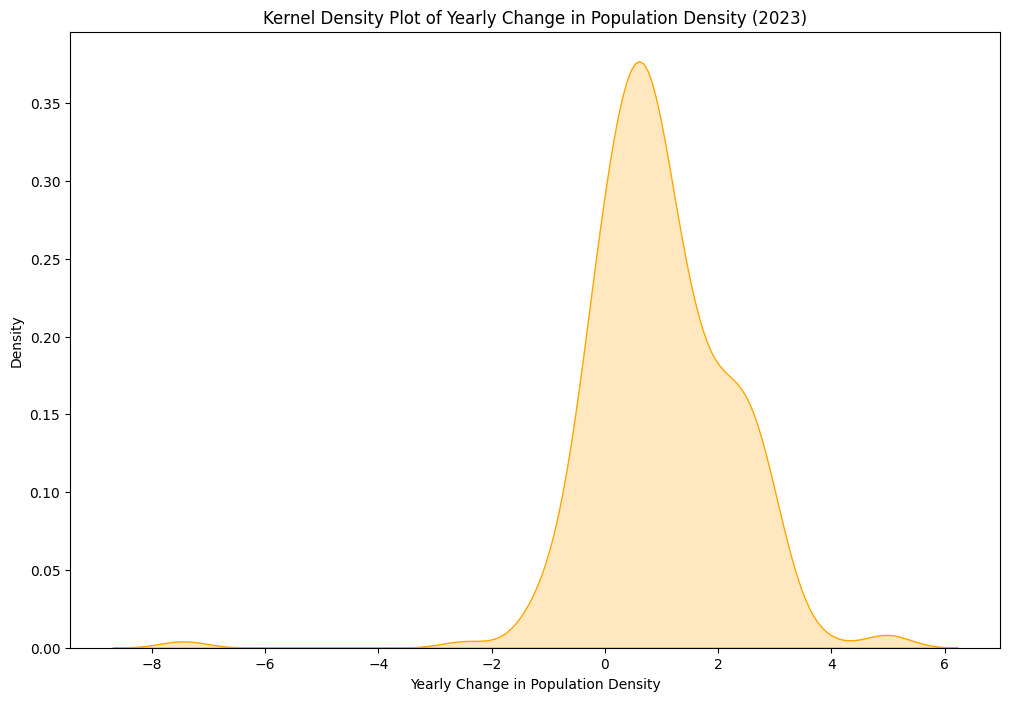

In [31]:
# Kernel density plot using seaborn for distribution of yearly change in population density
plt.figure(figsize=(12, 8))
sns.kdeplot(population_2023['yearly_change'], fill=True, color='orange')
plt.title('Kernel Density Plot of Yearly Change in Population Density (2023)')
plt.xlabel('Yearly Change in Population Density')
plt.ylabel('Density')
plt.show()


**Explore the relationship between net migrants and population in urban areas**

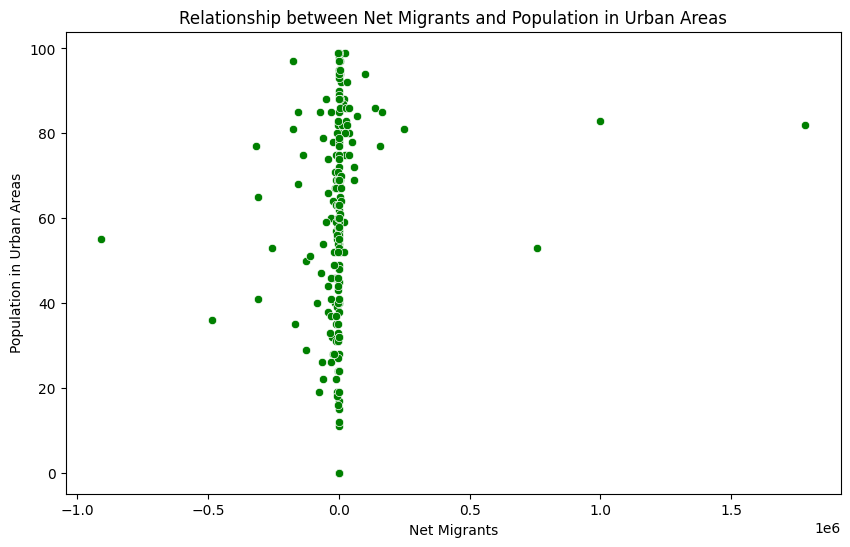

In [32]:
# Scatter plot using seaborn for net migrants vs. population in urban areas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=population_2023, x='net_migrants', y='population_urban', color='green')
plt.title('Relationship between Net Migrants and Population in Urban Areas')
plt.xlabel('Net Migrants')
plt.ylabel('Population in Urban Areas')
plt.show()


**Visualize the correlation between fertility rates and median ages**

<Figure size 1000x800 with 0 Axes>

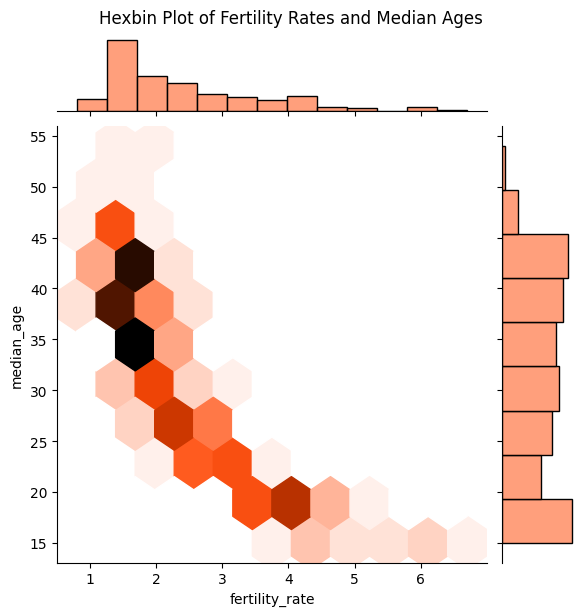

In [33]:
# Hexbin plot using seaborn for correlation between fertility rates and median ages
plt.figure(figsize=(10, 8))
sns.jointplot(data=country_stats, x='fertility_rate', y='median_age', kind='hex', color='coral')
plt.suptitle('Hexbin Plot of Fertility Rates and Median Ages', y=1.02)
plt.show()


**Investigate the relationship between population density and net migrants**

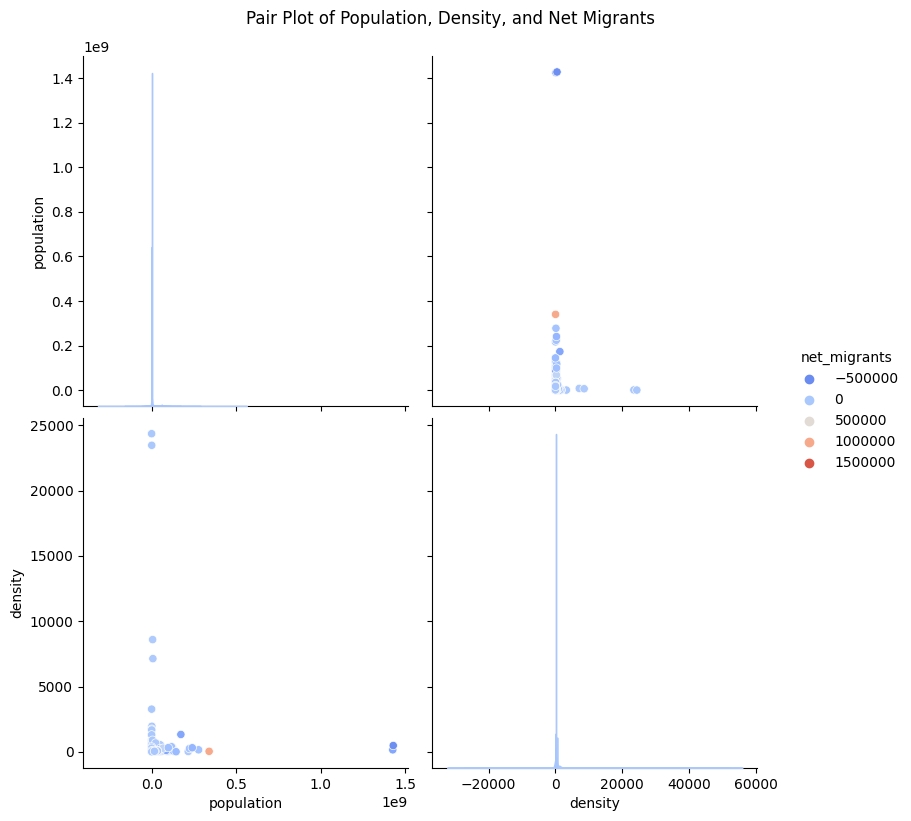

In [34]:
# Pair plot using seaborn for relationship between population density and net migrants
sns.pairplot(population_2023[['population', 'density', 'net_migrants']], height=4, hue='net_migrants', palette='coolwarm')
plt.suptitle('Pair Plot of Population, Density, and Net Migrants', y=1.02)
plt.show()


**Visualize the population growth trend in a specific country (e.g., United States)**

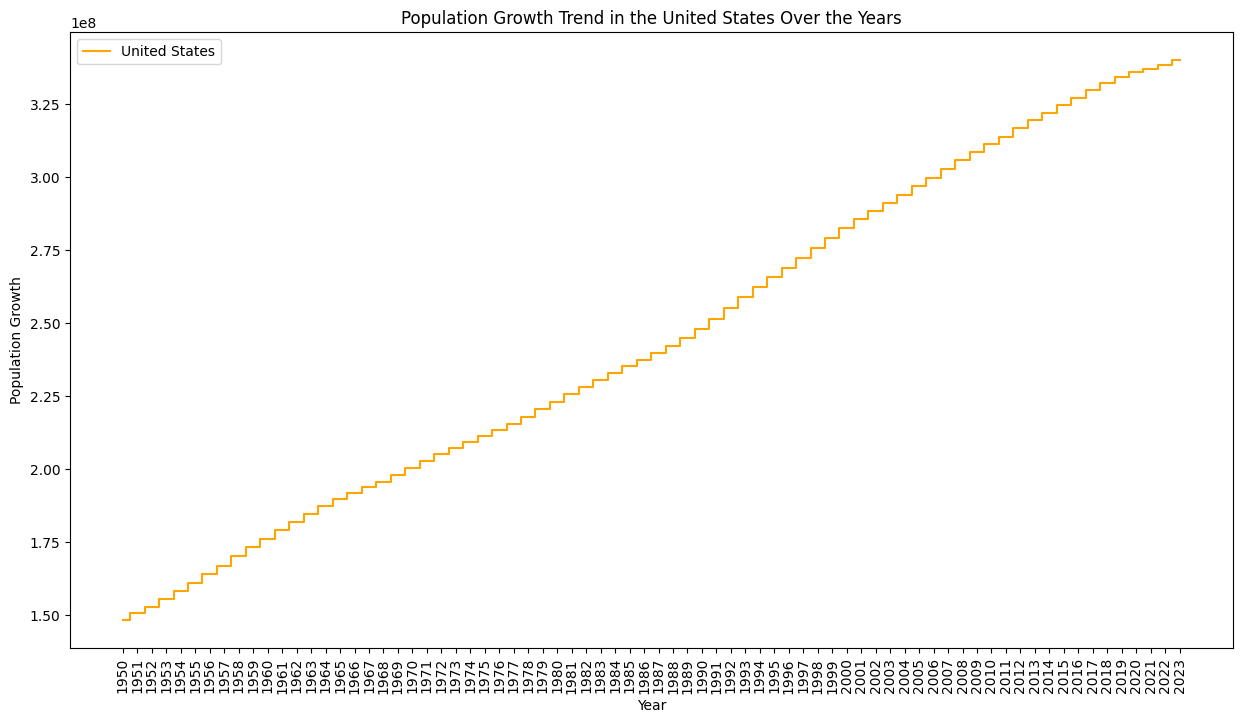

In [35]:
# Step plot using matplotlib for population growth trend in the United States
us_population_growth = population_by_year[population_by_year['country'] == 'United States'].iloc[:, 1:].sum()
plt.figure(figsize=(15, 8))
plt.step(us_population_growth.index, us_population_growth.values, where='mid', label='United States', color='orange')
plt.title('Population Growth Trend in the United States Over the Years')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Population Growth')
plt.legend()
plt.show()


**Investigate the distribution of population change in the year 2023**

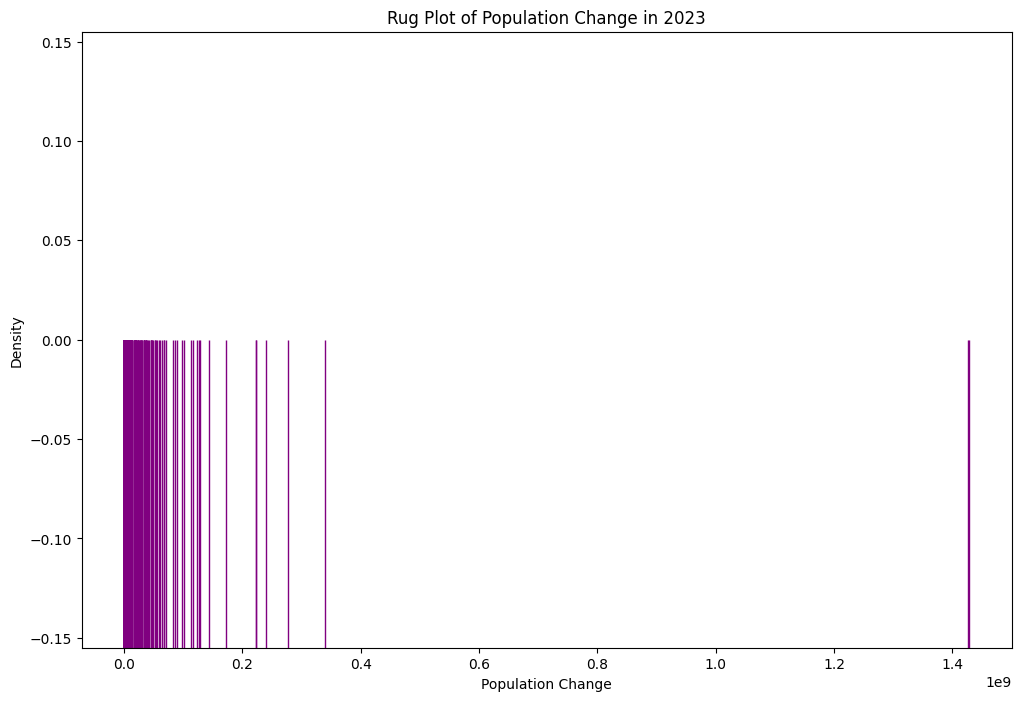

In [36]:
# Rug plot using seaborn for distribution of population change in 2023
plt.figure(figsize=(12, 8))
sns.rugplot(population_by_year['2023'], height=0.5, color='purple')
plt.title('Rug Plot of Population Change in 2023')
plt.xlabel('Population Change')
plt.ylabel('Density')
plt.show()


**Explore the distribution of fertility rates and median ages in different regions**

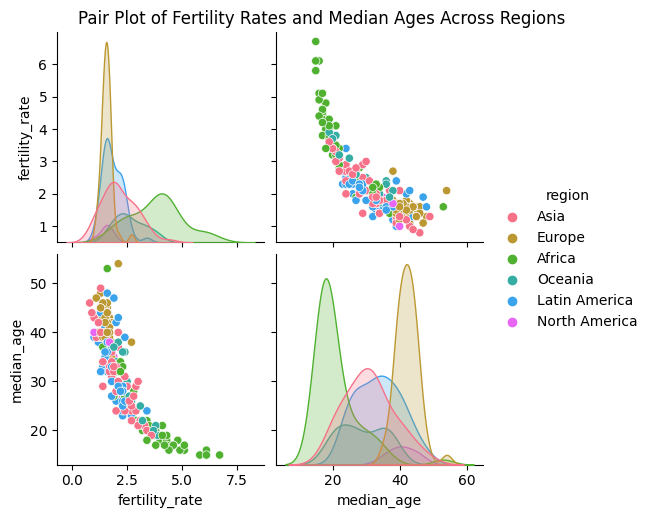

In [37]:
# Pair plot using seaborn for distribution of fertility rates and median ages across regions
sns.pairplot(country_stats[['fertility_rate', 'median_age', 'region']], hue='region', palette='husl')
plt.suptitle('Pair Plot of Fertility Rates and Median Ages Across Regions', y=1.02)
plt.show()


**Visualize the distribution of fertility rates across regions**

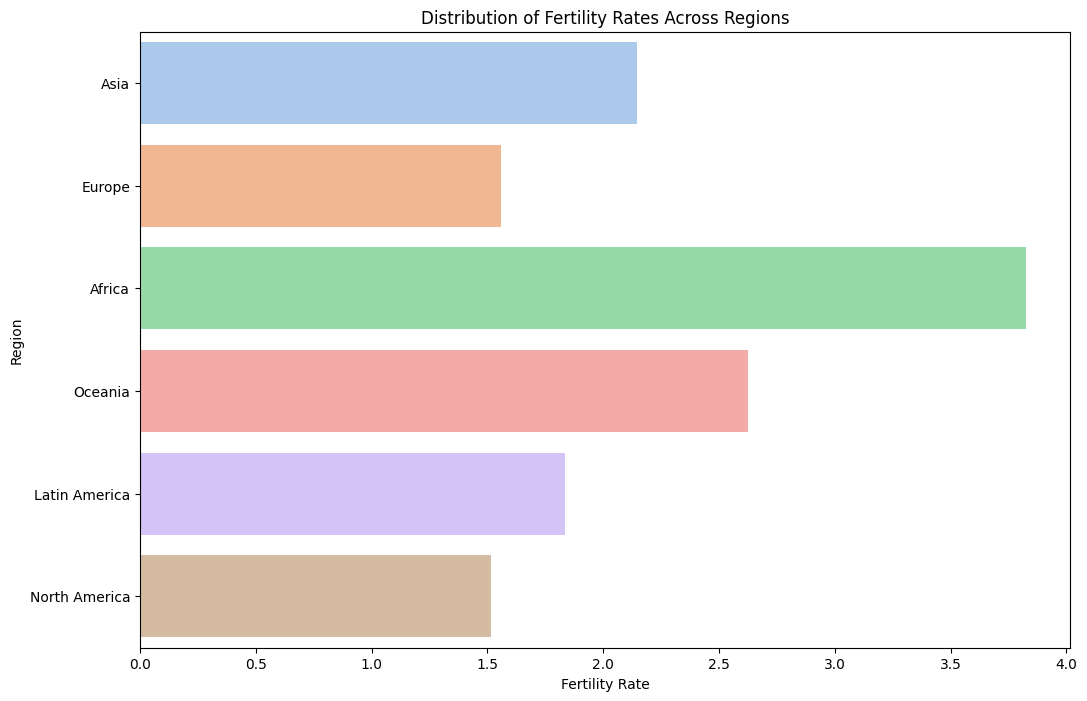

In [38]:
# Horizontal bar plot using seaborn for fertility rate distribution across regions
plt.figure(figsize=(12, 8))
sns.barplot(data=country_stats, y='region', x='fertility_rate', errorbar=None, palette='pastel')
plt.title('Distribution of Fertility Rates Across Regions')
plt.xlabel('Fertility Rate')
plt.ylabel('Region')
plt.show()


**Investigate the relationship between population and population density**

<Figure size 1000x800 with 0 Axes>

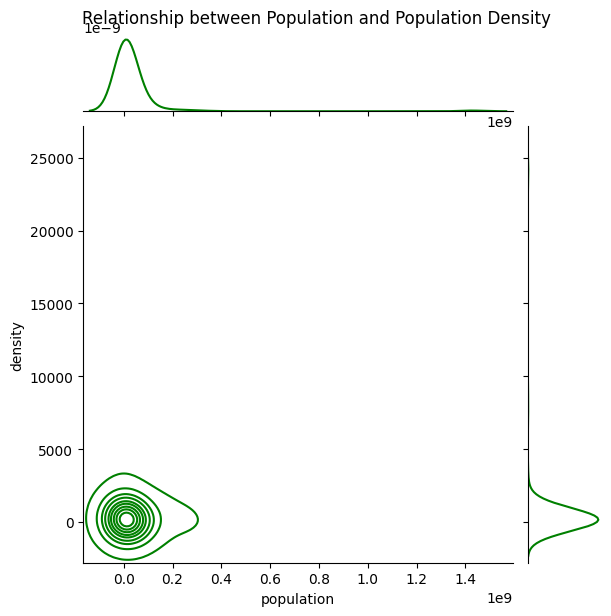

In [39]:
# Joint plot using seaborn for population vs. population density
plt.figure(figsize=(10, 8))
sns.jointplot(data=population_2023, x='population', y='density', kind='kde', color='green')
plt.suptitle('Relationship between Population and Population Density', y=1.02)
plt.show()


**Visualize the global population growth trend**

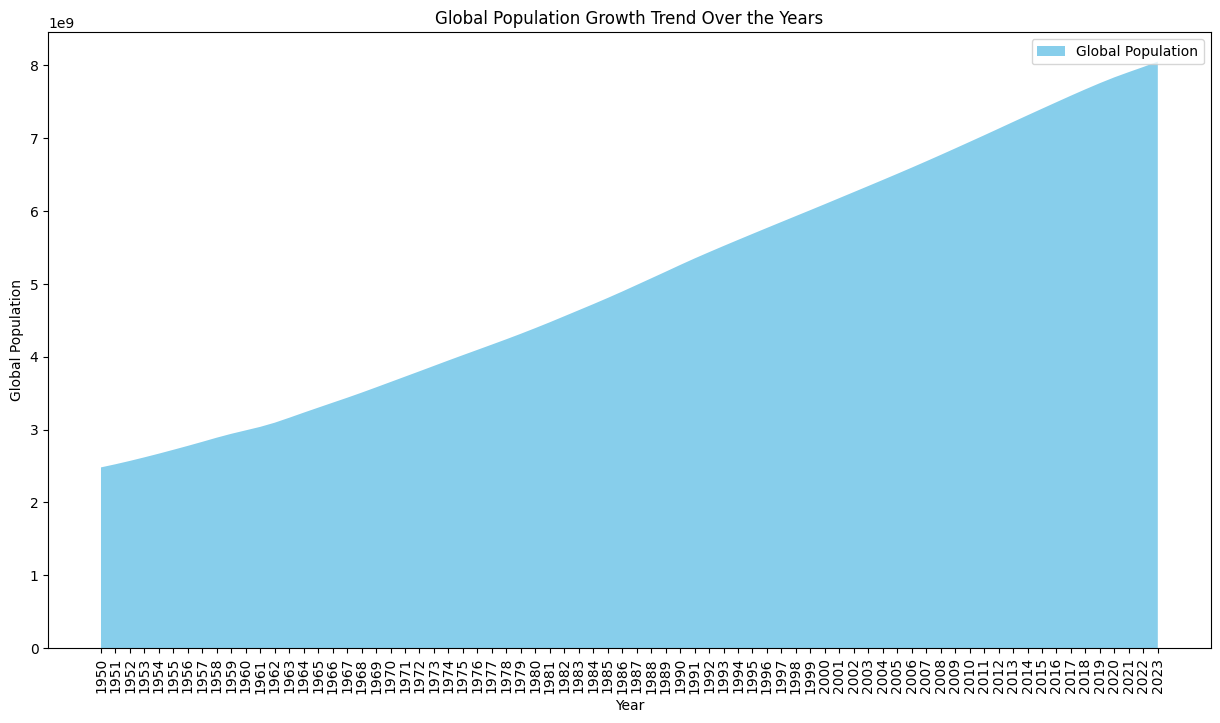

In [40]:
# Stacked area plot using matplotlib for global population growth trend
global_population_growth = population_by_year.iloc[:, 1:].sum()
plt.figure(figsize=(15, 8))
plt.stackplot(global_population_growth.index, global_population_growth.values, labels=['Global Population'], colors=['skyblue'])
plt.title('Global Population Growth Trend Over the Years')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Global Population')
plt.legend()
plt.show()


**Explore the correlation between land area, median age, and fertility rate.**

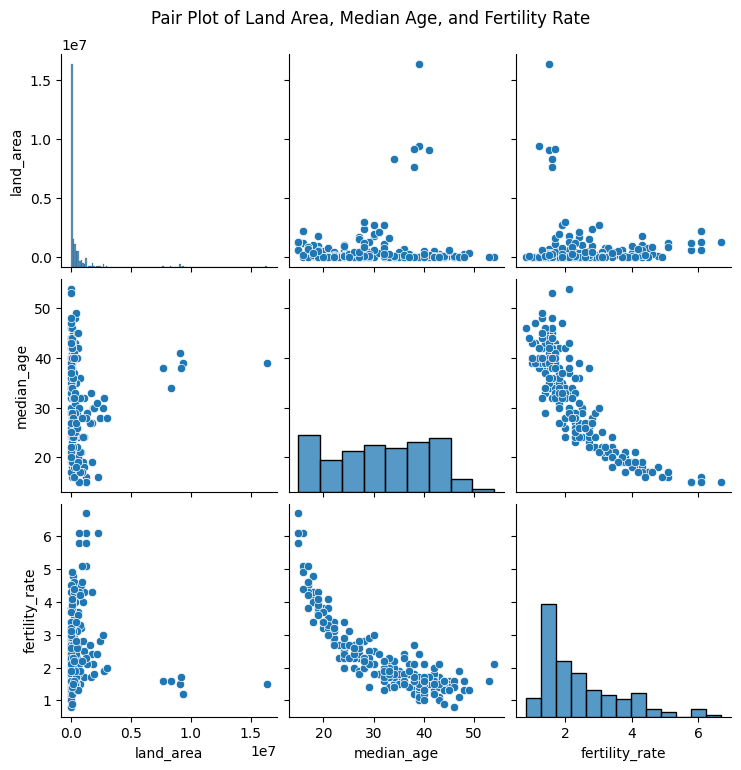

In [41]:
# Pair plot using seaborn for correlation investigation
sns.pairplot(country_stats[['land_area', 'median_age', 'fertility_rate']])
plt.suptitle('Pair Plot of Land Area, Median Age, and Fertility Rate', y=1.02)
plt.show()
